<a href="https://colab.research.google.com/github/Daniil-Khlyvniuk/python_math/blob/main/1_Have_fun_with_differential_equations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Задача

В сосуд, имеющий форму прямого кругового цилиндра, налита жидкость, например вода.
Сосуд вращается с постоянной угловой скоростью `w` относительно оси цилиндра. Требуется определить, какую форму примет поверхность жидкости, если вращение продолжается достаточно долго**!. При построении модели мы будем предполагать, что сосуд достаточно широкий и глубокий, это позволит пренебречь разными поверхностными эффектами около боковых стенок сосуда.

** `Достаточно долго` понимается здесь в том смысле, что вся жидкость в сосуде должна прийти в стационарное состояние относительно самого сосуда, т. е. каждый элементарный ее объем будет совершать только общее вращатель-ное движение с заданной угловой скоростью `w`.

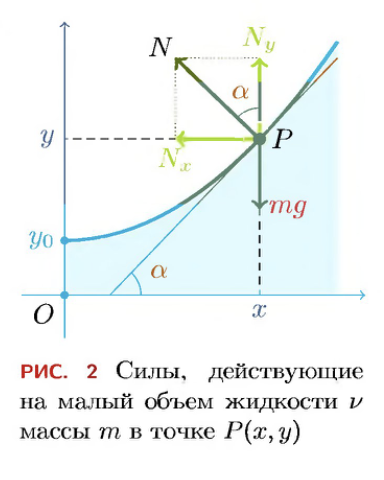


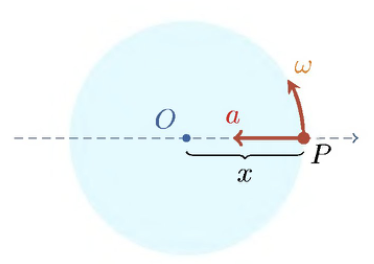

In [114]:
from sympy import *
from IPython.display import display
from numpy import arange

In [115]:
x, omega, y0, C1 = symbols("x omega y0 C1")
g = symbols("g", positive=True)

display(x, omega, y0, C1, g)

x

omega

y0

C1

g

Наше дифференциальное уравнение является простейшим, это значит, что оно решается непосредственным интегрированием его правой части.
Следовательно, для решения этого уравнения с помощью библиотеки `SymPy` нам достаточно определить только его правую часть, а не все уравнение целиком

In [116]:
ode_rhs = omega ** 2 * x / g

display(ode_rhs)

omega**2*x/g

Общее решение простейшего дифференциального уравнения `у = f(x)` - это неопределенный `интеграл` от правой части `f(х)` этого уравнения.

In [117]:
dsol = integrate(ode_rhs, x) + C1
display(dsol)

C1 + omega**2*x**2/(2*g)

Стандартный способ определения константы интегрирования `С1` в общем решении дифференциаль-ного уравнения из начального условия заключается в подстановке в это решение величин из начального условия, что приводит к алгебраическому уравнению для переменной `С1`. Решив это уравнение и подставив найденное решение вместо `С1` обратно в формулу общего решения, мы найдем решение соответствующей начальной задачи для заданного дифференциального уравнения.

In [118]:
eq1 = Eq(dsol. subs(x, 0), y0)

display(eq1)

Eq(C1, y0)

Следующим шагом решаем построенное уравнение с помощью команды

In [119]:
sol1 = solveset(eq1, C1)
C2 = tuple(sol1)[0]

display(sol1, C2)

{y0}

y0

Последним действием подставляем найденное зна-чение `С2` вместо символа `С1` в общее решение `dsol`, что и дает нам искомое решение начальной задачи.

In [120]:
dsol_y0 = dsol.subs(C1, C2)

display(dsol_y0)

y0 + omega**2*x**2/(2*g)

Как видно из последней формулы, найденная за-висимость высоты `у` поверхности жидкости от рассто-яния до оси вращения `x` оказывается квадратичной, т.е. интегральные кривые (графики решений диффе-ренциального уравнения) должны быть параболами.

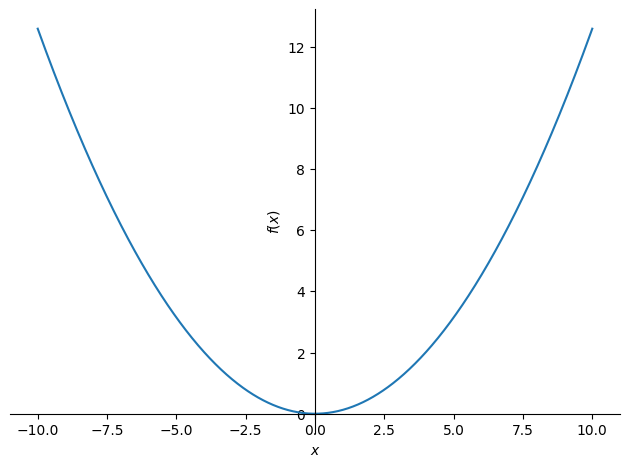

In [121]:
ds = dsol_y0.subs({ y0: 0, omega: pi/2, g: 9.8 })
p1 = plot(ds)

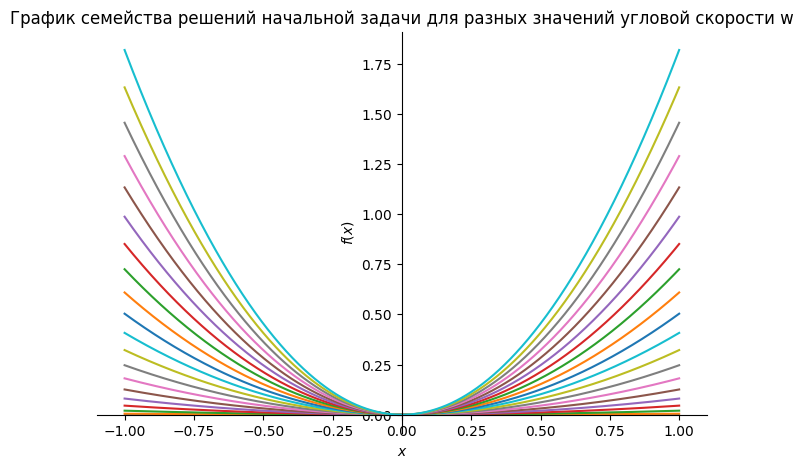

In [122]:
p2 = plot(show=False, title="График семейства решений начальной задачи для разных значений угловой скорости w")

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_y0.subs({ y0: 0, omega: om, g: 9.8 })
  p = plot(ds, (x, -1, 1), show=False)
  p2.extend(p)

p2.show()

При построении графиков решения выше мы про-извольно задавали значение параметра `у0` равным нулю. Более естественный подход к определению этого параметра заключается в вычислении объема вращающейся жидкости и учете очевидного условия, что этот объем является постоянной величиной, не завися-щей от скорости вращения `w`.

In [123]:
V0, R = symbols("V0 R")
vol = 2 * pi * integrate(dsol_y0 * x, (x, 0, R))
eq2 = Eq(V0, vol)

display(eq2)

Eq(V0, 2*pi*(R**4*omega**2/(8*g) + R**2*y0/2))

In [124]:
sol2 = solveset(eq2, y0)
y1 = simplify(tuple(sol2)[0])

display(sol2, y1)

{-(R**4*omega**2/g - 4*V0/pi)/(4*R**2)}

-R**2*omega**2/(4*g) + V0/(pi*R**2)

In [125]:
dsol_VO = dsol_y0.subs(y0, y1)

display(dsol_VO)

-R**2*omega**2/(4*g) + omega**2*x**2/(2*g) + V0/(pi*R**2)

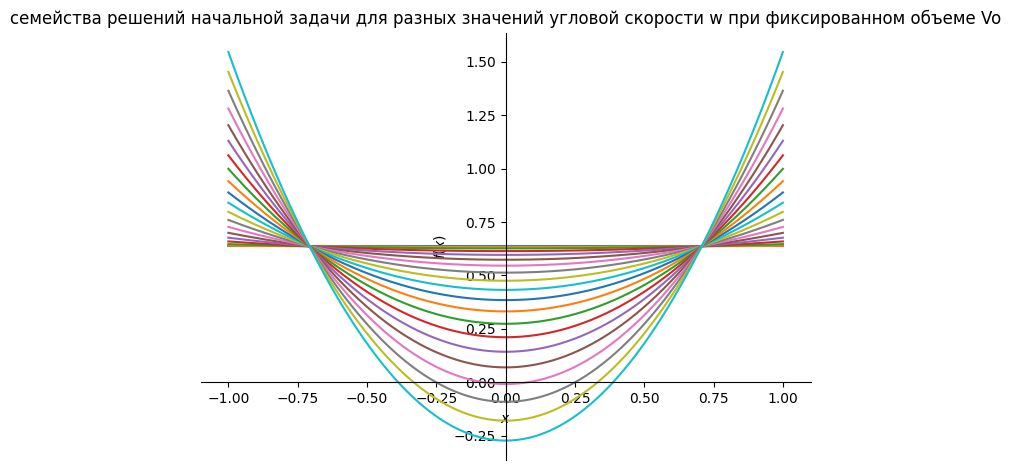

In [126]:
p3 = plot(show=False, title="семейства решений начальной задачи для разных значений угловой скорости w при фиксированном объеме Vo")

for om in arange(0, (2 * pi), (pi / 10)):
  ds = dsol_VO.subs({ V0: 2, R: 1, omega: om, g: 9.8 })
  p = plot(ds, (x, -1, 1), show=False)
  p3.extend(p)

p3.show()

Видно, что поведение интегральных кривых теперь стало более естественным - нижняя точка парабалоида постепенно опускается при увеличении скорости вращения. Однако при достижении дна цилиндра `(y = 0)` это поведение становится нереалистичным - поверхность жидкости в некоторой области оказыва-ется ниже дна цилиндра, а интегрирование по этой области дает отрицательный объем. То есть наши выкладки справедливы только при условии, что кривая `у(х)` располагается строго над осью `Ох`.

In [127]:
eq3 = Eq(dsol_VO.subs(x, 0), 0)
sol3 = solveset(eq3, omega)
omega0 = tuple(sol3)[1]

display(omega0)

2*sqrt(V0)*sqrt(g)/(sqrt(pi)*R**2)

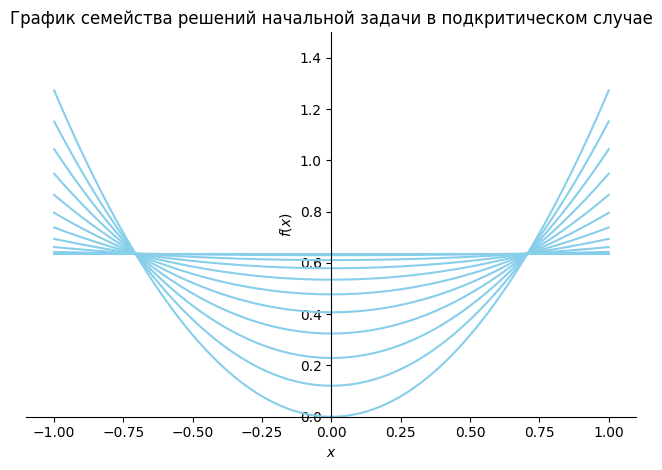

In [128]:
p4 = plot(ylim=(0, 1.5), show=False, title="График семейства решений начальной задачи в подкритическом случае")
par = { V0: 2, omega: 0, R: 1, g: 9.8 }
om0 = omega0.subs(par)

for om in arange(0, 1.1*om0, 0.1*om0):
  par[omega] = om
  ds = dsol_VO.subs(par)
  p = plot(ds, (x, -1, 1), line_color = "skyblue", show = False)
  p4.extend(p)

p4.show()

In [129]:
eq4 = Eq(dsol_y0, 0)
sol4 = solveset(eq4, x)
x0 = tuple(sol4)[0]

display(x0)

sqrt(2)*sqrt(g)*sqrt(-y0)/omega

In [130]:
vol1 = 2 * pi * integrate(dsol_y0 * x, (x, x0, R))

display(vol1)

2*pi*(R**4*omega**2/(8*g) + R**2*y0/2 + g*y0**2/(2*omega**2))

In [131]:
eq5 = Eq(vol1, V0)
sol5 = solveset(eq5, y0)
y2 = None

for s in tuple (sol5):
  res = s.subs(omega, omega0)

  if res == 0:
    y2 = s

dsol_sup = dsol_y0.subs(y0, y2)

display(dsol_sup)

-R**2*omega**2/(2*g) + sqrt(V0)*omega/(sqrt(pi)*sqrt(g)) + omega**2*x**2/(2*g)

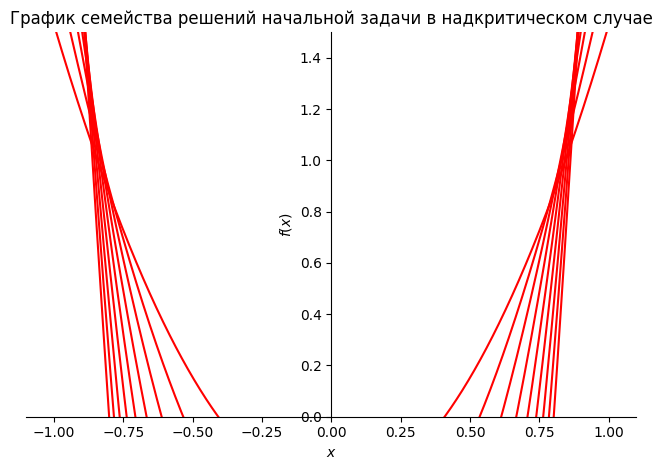

In [132]:
p5 = plot(ylim=(0, 1.5), show=False, title="График семейства решений начальной задачи в надкритическом случае")
par = { V0: 2, omega: 0, R: 1, g: 9.8 }
om0 = omega0.subs(par)

for om in arange(1.2 * om0, 3 * om0, 0.2 * om0):
  par[omega] = om
  ds = dsol_sup.subs(par)
  p = plot(ds, (x, -1, 1), line_color = "red", show = False)
  p5.extend(p)

p5.show()

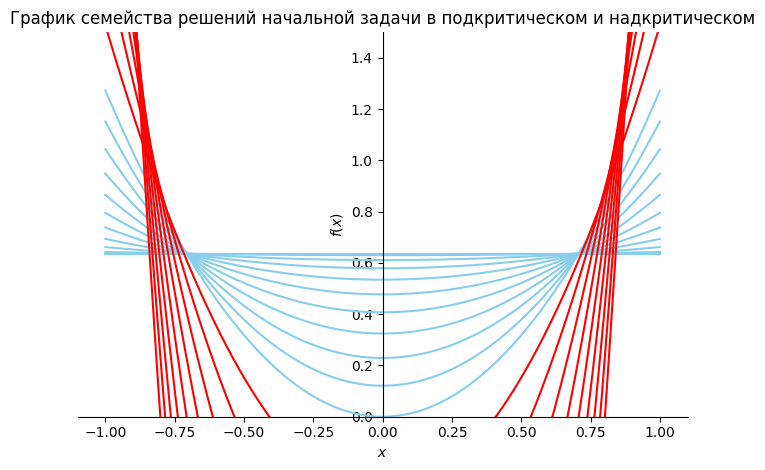

In [133]:
p6 = plot(
    ylim=(0, 1.5),
    show=False,
    title="График семейства решений начальной задачи в подкритическом и надкритическом",
    )


p6.extend(p4)
p6.extend(p5)

p6.show()

